In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_42641_Z')

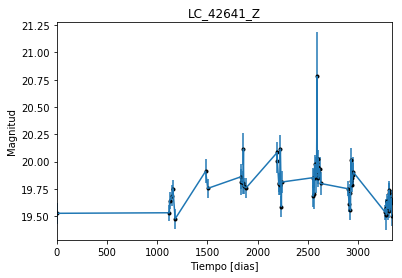

In [2]:
data = np.genfromtxt('LC_42641_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_42641_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

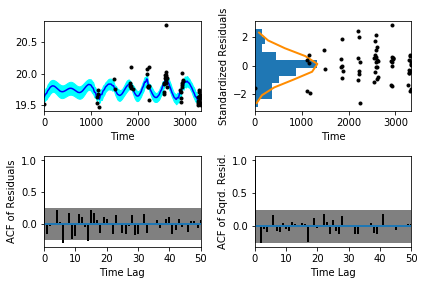

In [5]:
sample.assess_fit()

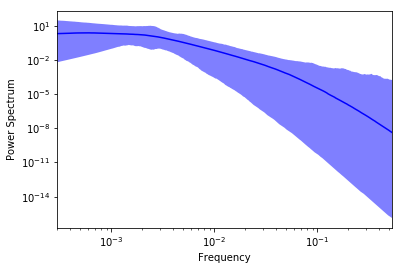

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_42641_Z')

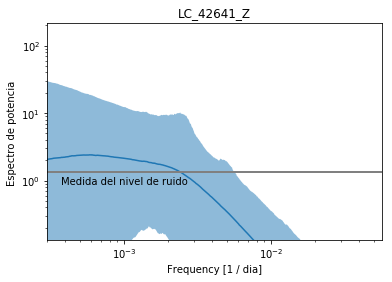

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_42641_Z')

Text(0.5,1,'Prediccion , valor esperado LC_42641_Z')

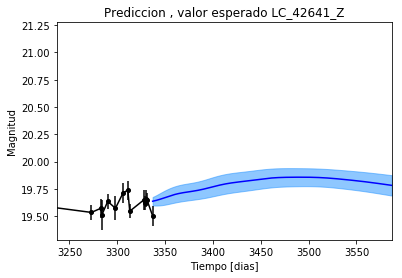

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_42641_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_42641_Z')

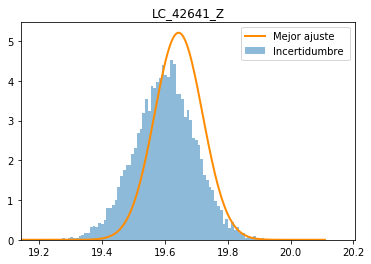

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_42641_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_42641_Z')

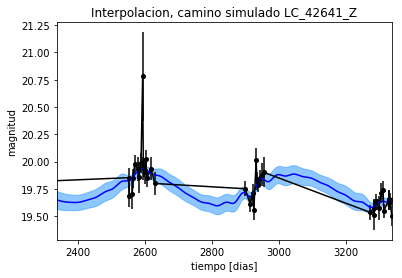

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42641_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_42641_Z')

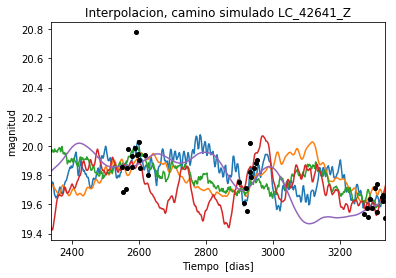

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_42641_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 625.037841332
Median: 0.0128845113264
Standard deviation: 0.202751349499
68% credibility interval: [ 0.00108118  0.1931035 ]
95% credibility interval: [  3.70926019e-04   7.96964890e-01]
99% credibility interval: [  3.08122788e-04   1.01469184e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 507.611600633
Median: 0.00451190796206
Standard deviation: 0.106566337926
68% credibility interval: [ 0.00070195  0.05517996]
95% credibility interval: [  3.43041626e-04   3.62309702e-01]
99% credibility interval: [  3.08088365e-04   7.76939035e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 393.890795116
Median: 0.0240564309656


In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1499.18129379
Median: 66.2744620879
Standard deviation: 1.62322992597
68% credibility interval: [ 64.37433397  67.44715431]
95% credibility interval: [ 62.06384319  68.21097677]
99% credibility interval: [ 60.20260624  68.85902627]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 395.696723891
Median: 0.759997837179
Standard deviation: 2.3907525979
68% credibility interval: [ 0.09029141  4.29069338]
95% credibility interval: [ 0.0193383   8.09317757]
99% credibility interval: [  0.01199163  10.85277859]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 743.737258132
Median: 0.86526588609
Standard deviation: 10.7587486034
68% credibility interval: [  0.01971119  13.00187117]
95% credibility interval: [  1.00135302e

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 40499.2016531
Median: 0.00152707284142
Standard deviation: 9.79488678103e+128
68% credibility interval: [  1.97291675e-39   1.25274600e+52]
95% credibility interval: [  3.64580120e-129   1.04720460e+089]
99% credibility interval: [  2.20356123e-166   1.65573396e+128]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2275.28746192
Median: 19.7360697026
Standard deviation: 0.0629214805428
68% credibility interval: [ 19.67873432  19.78332948]
95% credibility interval: [ 19.59052584  19.84084535]
99% credibility interval: [ 19.49916113  19.89888472]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1064.94334367
Median: 0.0257405112337
Standard deviation: 0.273525480195
68% credibility interval: [ 0.          0.47280076]
95% credibility interval: [ 0.          0.94553517]
99% credibility interval: [ 0.          1.03690886]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1064.94334367
Median: 0.0257405112337
Standard deviation: 0.273525480195
68% credibility interval: [ 0.          0.47280076]
95% credibility interval: [ 0.          0.94553517]
99% credibility interval: [ 0.          1.03690886]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1558.26734095
Median: 0.0
Standard deviation: 0.00119649963874
68% cre

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1499.18129379
Median: 66.2744620879
Standard deviation: 1.62322992597
68% credibility interval: [ 64.37433397  67.44715431]
95% credibility interval: [ 62.06384319  68.21097677]
99% credibility interval: [ 60.20260624  68.85902627]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3027.67029505
Median: 0.0208174066128
Standard deviation: 0.0189400101938
68% credibility interval: [ 0.0122161   0.03811989]
95% credibility interval: [ 0.00715536  0.07540569]
99% credibility interval: [ 0.0048197   0.12066168]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2507.88950653
Median: 1.12200308669
Standard deviation: 0.186171450879
68% credibility interval: [ 0.96022366  1.32130787]
95% credibility interval: [ 0.8267038   1.56862477]
99% credibility interval: [ 0.759353   1.7154591]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 961.473645496
Median: 1.77374816091e-05
Standard deviation: 0.372774688959
68% credibility interval: [  4.80733484e-54   2.61563859e-02]
95% credibility interval: [  4.91961016e-92   5.79987643e-01]
99% credibility interval: [  1.28466622e-130   2.33567296e+000]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 625.037841332
Median: (-0.0809557722563-0.44773380096j)
Standard deviation: 2.1392774127
68% credibility interval: [-1.21330508-3.61069424j -0.00679323-0.12549113j]
95% credibility interval: [ -5.00747809e+00-4.87861528j  -2.33059691e-03-0.07567284j]
99% credibility interval: [ -6.37549684e+00+0.j          -1.93599257e-03-0.01053405j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 507.611600633
Median: (-0.0283491538146+0j)
Standard deviation: 1.84443942999
68% credibility interval: [-0.34670593+1.91167399j -0.00441050+0.08796829j]
95% credibility interval: [ -2.27645900e+00+6.06315825j  -2.15539410e-03+0.01609327j]
99% credibility interval: [ -4.88165193e+00+3.10802702j  -1.93577629e-03+0.01581331j]
Posterior summary